# BIG DATA Final - Movie Rating Predictive Model

### Packages and Libraries

In [ ]:
# libraries and packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#text prep
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

from nltk import punkt

#number processing
from sklearn.preprocessing import MinMaxScaler

#TF-IDF and LSA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

#predictions
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

#model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

### Read in and Clean File

In [ ]:
from google.colab import files
upload = files.upload()

Saving movies.csv to movies.csv


In [ ]:
df = pd.read_csv('movies.csv')

In [ ]:
# Examine Dataframe

df.head(2)

# Column Title
#print(df.columns)


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...


In [ ]:
# MISSING VALUES

# Show number of missing values
print(df.isnull().sum())

# Replace any instances of 0 (bad data) with null
df_0 = df.replace(0, np.nan)

# drop NAs
df_0.dropna(inplace=True)

print(df_0.isnull().sum())

id                           0
title                        6
genres                  210488
original_language            0
overview                118341
popularity                   0
production_companies    385187
release_date             51847
budget                       0
revenue                      0
runtime                  34363
status                       0
tagline                 614121
vote_average                 0
vote_count                   0
credits                 224853
keywords                511997
poster_path             184729
backdrop_path           499531
recommendations         687442
dtype: int64
id                      0
title                   0
genres                  0
original_language       0
overview                0
popularity              0
production_companies    0
release_date            0
budget                  0
revenue                 0
runtime                 0
status                  0
tagline                 0
vote_average            0
vot

In [ ]:
# CLEAN UP DATAFRAME

# Drop useless columns
df_1 = df_0.drop(columns=['id',
                      #'title',
                      #'genres',
                      'original_language',
                      #'overview',
                      #'popularity',
                      #'production_companies',
                      'release_date',
                      #'budget',
                      #'revenue',
                      #'runtime',
                      'status',
                      #'tagline',
                      #'vote_average',
                      'vote_count',
                      'credits',
                      #'keywords',
                      'poster_path',
                      'backdrop_path',
                      'recommendations'])

df_1.head(2)
#print(df_1.columns)

,title,genres,overview,popularity,production_companies,budget,revenue,runtime,tagline,vote_average,keywords
0,Meg 2: The Trench,Action-Science Fiction-Horror,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,129000000.0,352056482.0,116.0,Back for seconds.,7.079,based on novel or book-sequel-kaiju
1,The Pope's Exorcist,Horror-Mystery-Thriller,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,18000000.0,65675816.0,103.0,Inspired by the actual files of Father Gabriel...,7.433,spain-rome italy-vatican-pope-pig-possession-c...


In [ ]:
# TRANSFORM DATA TYPES
# Transform data type
df_1['title'] = df_1['title'].astype(str)

#Separate out genres
df_1['genres'] = df_1['genres'].str.replace('-', ', ')


#CHECK
print(df_1.head(2))
all_column_types = df_1.dtypes
print("\nData types of all columns:")
print(all_column_types)

                 title                           genres  \
0    Meg 2: The Trench  Action, Science Fiction, Horror   
1  The Pope's Exorcist        Horror, Mystery, Thriller   

                                            overview  popularity  \
0  An exploratory dive into the deepest depths of...    8763.998   
1  Father Gabriele Amorth Chief Exorcist of the V...    5953.227   

                                production_companies       budget  \
0  Apelles Entertainment-Warner Bros. Pictures-di...  129000000.0   
1  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   18000000.0   

       revenue  runtime                                            tagline  \
0  352056482.0    116.0                                  Back for seconds.   
1   65675816.0    103.0  Inspired by the actual files of Father Gabriel...   

   vote_average                                           keywords  
0         7.079                based on novel or book-sequel-kaiju  
1         7.433  spain-rome italy-va

In [ ]:
# DATA SIZE

unique_titles_count = df_1['title'].nunique()
print("Total number of unique titles:", unique_titles_count)

Total number of unique titles: 5914


### Preprocess Features

In [ ]:
df_shape = df_1.shape
print("Shape of the DataFrame:", df_shape)

Shape of the DataFrame: (6070, 11)


In [ ]:
df_1['features'] = df_1['title'] + ' ' + df_1['genres'] + ' ' + df_1['overview'] + ' ' + df_1['production_companies'] + ' ' + df_1['tagline'] + ' ' + df_1['keywords']

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# preprocess data
def preprocess_feature(features):
    # Remove non-alphanumeric characters
    cleaned_text = re.sub(r'\W+', ' ', features).lower()

    # Tokenize
    tokens = word_tokenize(cleaned_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    stemmed = [stemmer.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]

    # Reconstruct the message from lemmatized tokens
    return ' '.join(lemmatized)

# Apply preprocessing to the features column
df_1['features'] = df_1['features'].apply(preprocess_feature)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# apply tfidf vectorizer object with parameters
tfidf_vectorizer = TfidfVectorizer(min_df=1, norm='l2', smooth_idf=True, use_idf=True, ngram_range=(1, 1))

# fit on data and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(df_1['features'])

In [ ]:
# Apply LSA
n_components = 50  # You can adjust the number of components
lsa = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_lsa = lsa.fit_transform(tfidf_matrix)

In [ ]:
# normalize numeric values
scaler = MinMaxScaler()
popularity_scaled = scaler.fit_transform(df_1[['popularity']])
budget_scaled = scaler.fit_transform(df_1[['budget']])
revenue_scaled = scaler.fit_transform(df_1[['revenue']])
runtime_scaled = scaler.fit_transform(df_1[['runtime']])

In [ ]:
#combine text and numeric features
combined_features = np.concatenate((tfidf_lsa, popularity_scaled, budget_scaled, revenue_scaled, runtime_scaled), axis=1)


In [ ]:
#check array
combined_features

array([[ 1.73725165e-01,  1.10309144e-01, -3.41359546e-02, ...,
         2.80434781e-01,  1.20552537e-01,  4.50199203e-01],
       [ 7.95583560e-02,  1.63715171e-02,  2.62123436e-02, ...,
         3.91304327e-02,  2.24889643e-02,  3.98406375e-01],
       [ 1.89859155e-01,  1.31696454e-01, -1.18554987e-01, ...,
         4.34782607e-01,  1.39382077e-01,  4.94023904e-01],
       ...,
       [ 1.45913238e-01, -4.77859263e-02,  1.03720024e-02, ...,
         1.26086955e-01,  1.50666478e-02,  4.62151394e-01],
       [ 1.72706936e-01,  1.33938825e-01, -6.66103876e-02, ...,
         6.52173893e-02,  2.33291704e-02,  5.09960159e-01],
       [ 6.89937643e-02, -1.67489359e-02, -2.17660004e-02, ...,
         0.00000000e+00,  4.00635916e-08,  0.00000000e+00]])

### Define Lables

In [ ]:
#define lables
def categorize_score(score):
    if score <= 3:
        return 0 #'bad'
    elif score <= 7:
        return 1 #'neutral'
    else:
        return 2 #'good'


df_1['predict_vote'] = df_1['vote_average'].apply(categorize_score)

### Split and Train

In [ ]:
#define Variables
X = combined_features
y = df_1['predict_vote']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define Model

In [ ]:
# Initialize and train classifier
model = OneVsRestClassifier(LogisticRegression(random_state=42))
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [ ]:
df_1

,title,genres,overview,popularity,production_companies,budget,revenue,runtime,tagline,vote_average,keywords,features,predict_vote
0,Meg 2: The Trench,"Action, Science Fiction, Horror",An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,129000000.0,352056482.0,116.0,Back for seconds.,7.079,based on novel or book-sequel-kaiju,meg 2 trench action scienc fiction horror expl...,2
1,The Pope's Exorcist,"Horror, Mystery, Thriller",Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,18000000.0,65675816.0,103.0,Inspired by the actual files of Father Gabriel...,7.433,spain-rome italy-vatican-pope-pig-possession-c...,pope exorcist horror mysteri thriller father g...,2
2,Transformers: Rise of the Beasts,"Action, Adventure, Science Fiction",When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,200000000.0,407045464.0,127.0,Unite or fall.,7.340,peru-alien-end of the world-based on cartoon-b...,transform rise beast action adventur scienc fi...,2
3,Dune: Part Two,"Science Fiction, Adventure",Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,190000000.0,683813734.0,167.0,Long live the fighters.,8.300,epic-based on novel or book-fight-sandstorm-sa...,dune part two scienc fiction adventur follow m...,2
4,Ant-Man and the Wasp: Quantumania,"Action, Adventure, Science Fiction",Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,200000000.0,475766228.0,125.0,Witness the beginning of a new dynasty.,6.507,hero-ant-sequel-superhero-based on comic-famil...,ant man wasp quantumania action adventur scien...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122516,A Rainy Day in New York,"Comedy, Romance",Two young people arrive in New York to spend a...,1.577,Gravier Productions-FilmNation Entertainment-P...,25000000.0,23800000.0,92.0,Love In Spring.,6.500,new york city,raini day new york comedi romanc two young peo...,1
134928,X-Men,"Adventure, Action, Science Fiction",Two mutants Rogue and Wolverine come to a priv...,1.423,The Donners' Company-Bad Hat Harry Productions...,75000000.0,296339527.0,104.0,Trust a few. Fear the rest.,6.992,mutant-superhero-based on comic-superhuman,x men adventur action scienc fiction two mutan...,1
286694,The Internship,Comedy,Two recently laid-off men in their 40s try to ...,0.822,20th Century Fox-Regency Enterprises-21 Laps E...,58000000.0,44000000.0,119.0,Hiring them was a brilliant mistake.,6.300,competition-california-mattress shop-job inter...,internship comedi two recent laid men 40 tri m...,1
314700,Stalingrad,"War, Action, Drama",A band of determined Russian soldiers fight to...,0.656,Art Pictures Studio-Non-Stop Productions,30000000.0,68129518.0,131.0,The epic battle that turned the tide of World ...,6.500,world war ii-soviet union-nazi-soviet military...,stalingrad war action drama band determin russ...,1


predict_vote
1    4299
2    1768
0       3
Name: count, dtype: int64


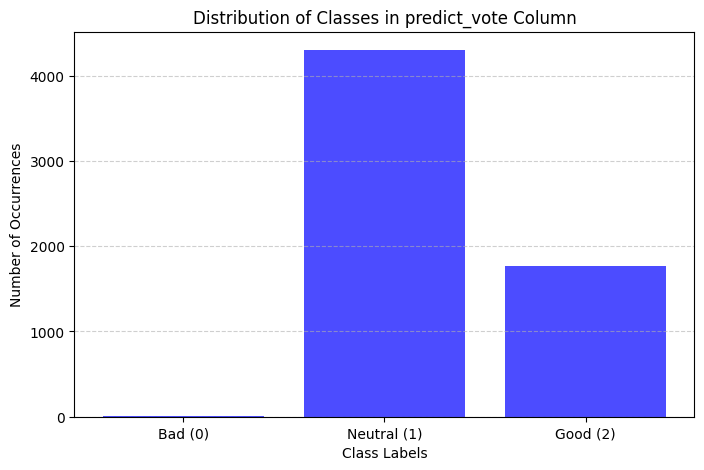

In [ ]:
class_counts = df_1['predict_vote'].value_counts()

# Print the counts
print(class_counts)
class_counts = df_1['predict_vote'].value_counts()
class_counts = class_counts.reindex([0, 1, 2], fill_value=0)
plt.figure(figsize=(8, 5))  # Set figure size
plt.bar(class_counts.index, class_counts.values, color='blue', alpha=0.7)
plt.xlabel('Class Labels')  # Label for the X-axis
plt.ylabel('Number of Occurrences')  # Label for the Y-axis
plt.title('Distribution of Classes in predict_vote Column')  # Title of the plot
plt.xticks(class_counts.index, ['Bad (0)', 'Neutral (1)', 'Good (2)'])  # Set labels for x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add a gridline for better readability
plt.show()


### Test Model and Reveal Accuracy Measures

In [ ]:
print(np.unique(y_test, return_counts=True))


(array([1, 2]), array([857, 357]))
